In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
data = pd.read_csv('data/Abun_Fe_S1.csv')
data.head()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
0,26.0,0.0,4073.7620,-88.4054,0.0029,7.3413,0.0210,-4.6180,0.0056,0.30775,-3.9063,26339.70
1,26.0,0.0,4157.7790,-87.2763,0.0013,8.2950,0.0312,-4.9527,0.0059,0.42474,-4.3539,27559.58
2,26.0,0.0,4217.5456,-87.4688,0.0017,9.2306,0.0282,-3.9213,0.0067,1.57132,-4.3539,27666.35
3,26.0,0.0,4247.3050,-88.4475,0.0008,8.0209,0.0077,-4.3028,0.0020,4.37442,-3.0023,19788.25
4,26.0,0.0,4250.1180,-88.4930,0.0002,9.8508,0.0114,-4.4257,0.0009,28.50019,-5.0173,19912.49


In [20]:
data.describe()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
count,67.0,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26.0,0.388060,4970.772494,-87.507164,0.002421,8.735167,0.028234,-4.543382,0.004075,5.216027,-3.931236,32862.591642
std,0.0,0.490986,601.207992,1.516540,0.002674,1.416782,0.020976,0.584173,0.003294,10.019076,1.433686,21881.763892
min,26.0,0.000000,4073.762000,-92.782700,0.000000,5.542000,0.001200,-5.246800,0.000100,0.131310,-6.681800,0.000000
25%,26.0,0.000000,4415.208500,-87.928950,0.000850,7.845600,0.011200,-4.895350,0.001500,0.638155,-5.017300,19850.370000
50%,26.0,0.000000,5001.952900,-87.371400,0.001900,8.521000,0.025700,-4.765900,0.003600,2.148470,-3.681300,26339.700000
75%,26.0,1.000000,5308.501000,-87.069050,0.002800,9.683350,0.040800,-4.400150,0.006100,5.173400,-3.229200,33801.570000
max,26.0,1.000000,6456.379600,-83.151700,0.017000,12.181000,0.096300,-2.370300,0.014400,55.177840,-1.176800,85679.760000


In [21]:
mag = pd.read_csv("data/Abun_Fe_magn.csv")
mag.head()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
0,26.0,0.0,4073.7620,-88.4675,0.0041,4.1979,0.2059,-4.8595,0.0055,0.47680,-3.9063,26339.70
1,26.0,0.0,4157.7790,-87.1300,0.0025,5.2968,0.0000,-5.3016,0.0057,2.83828,-4.3539,27559.58
2,26.0,0.0,4217.5456,-87.3741,0.0028,7.0558,0.0768,-4.7597,0.0084,2.40483,-4.3539,27666.35
3,26.0,0.0,4247.3050,-89.2437,0.0010,7.2320,0.0203,-4.5247,0.0037,26.35101,-3.0023,19788.25
4,26.0,0.0,4250.1180,-87.6070,0.0005,11.0379,0.0056,-5.0336,0.0024,327.67735,-5.0173,19912.49


In [22]:
mag.describe()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,Tau5000,Energy
count,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,26.0,0.397059,5017.830335,-89.128700,0.003757,6.315638,0.086601,-4.714025,0.005319,50.113138,-3.907412,33436.726912
std,0.0,0.492926,629.260508,14.304065,0.004145,2.265091,0.178735,0.890745,0.004764,126.028195,1.454405,21254.682918
min,26.0,0.000000,4073.762000,-204.559200,0.000000,0.442800,0.000000,-5.907000,0.000000,0.476800,-6.681800,11976.240000
25%,26.0,0.000000,4534.969950,-87.868950,0.001375,5.036800,0.016125,-5.140825,0.001975,3.047582,-5.017300,20830.580000
50%,26.0,0.000000,5003.488500,-87.434200,0.003050,6.421500,0.045600,-4.858500,0.004250,13.407790,-3.681300,27020.685000
75%,26.0,1.000000,5402.225200,-86.922675,0.004950,7.577550,0.086025,-4.555675,0.006700,24.477653,-3.229200,33801.570000
max,26.0,1.000000,6456.379600,-80.470200,0.029400,11.396000,1.241400,0.491000,0.023300,675.996800,-0.256600,85679.760000


In [23]:
merged_df = pd.merge(data, mag, on=["Element", "Ion", "Lambda"], suffixes=('', '_mag'))
merged_df.head()

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,...,Energy,Vr_mag,Vr_err_mag,Vsini_mag,Vsini_err_mag,Abun_mag,Abun_err_mag,Chi_sq_mag,Tau5000_mag,Energy_mag
0,26.0,0.0,4073.7620,-88.4054,0.0029,7.3413,0.0210,-4.6180,0.0056,0.30775,...,26339.70,-88.4675,0.0041,4.1979,0.2059,-4.8595,0.0055,0.47680,-3.9063,26339.70
1,26.0,0.0,4157.7790,-87.2763,0.0013,8.2950,0.0312,-4.9527,0.0059,0.42474,...,27559.58,-87.1300,0.0025,5.2968,0.0000,-5.3016,0.0057,2.83828,-4.3539,27559.58
2,26.0,0.0,4217.5456,-87.4688,0.0017,9.2306,0.0282,-3.9213,0.0067,1.57132,...,27666.35,-87.3741,0.0028,7.0558,0.0768,-4.7597,0.0084,2.40483,-4.3539,27666.35
3,26.0,0.0,4247.3050,-88.4475,0.0008,8.0209,0.0077,-4.3028,0.0020,4.37442,...,19788.25,-89.2437,0.0010,7.2320,0.0203,-4.5247,0.0037,26.35101,-3.0023,19788.25
4,26.0,0.0,4250.1180,-88.4930,0.0002,9.8508,0.0114,-4.4257,0.0009,28.50019,...,19912.49,-87.6070,0.0005,11.0379,0.0056,-5.0336,0.0024,327.67735,-5.0173,19912.49


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Element        64 non-null     float64
 1   Ion            64 non-null     float64
 2   Lambda         64 non-null     float64
 3   Vr             64 non-null     float64
 4   Vr_err         64 non-null     float64
 5   Vsini          64 non-null     float64
 6   Vsini_err      64 non-null     float64
 7   Abun           64 non-null     float64
 8   Abun_err       64 non-null     float64
 9   Chi_sq         64 non-null     float64
 10  Tau5000        64 non-null     float64
 11  Energy         64 non-null     float64
 12  Vr_mag         64 non-null     float64
 13  Vr_err_mag     64 non-null     float64
 14  Vsini_mag      64 non-null     float64
 15  Vsini_err_mag  64 non-null     float64
 16  Abun_mag       64 non-null     float64
 17  Abun_err_mag   64 non-null     float64
 18  Chi_sq_mag  

In [25]:
merged_df[["Chi_sq", "Chi_sq_mag"]].describe()

,Chi_sq,Chi_sq_mag
count,64.000000,64.000000
mean,5.185083,52.095700
std,10.231264,129.700796
min,0.131310,0.476800
25%,0.603695,2.824982
50%,1.941090,11.891810
75%,4.562845,26.568025
max,55.177840,675.996800


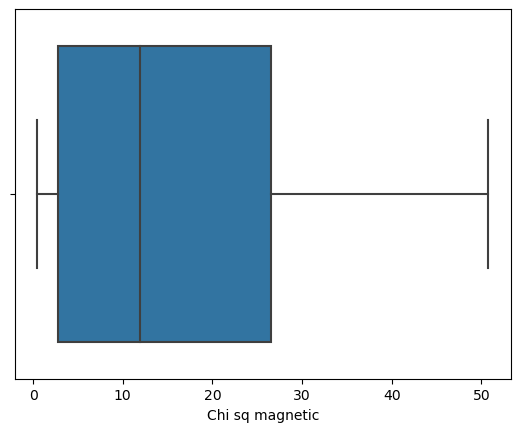

In [26]:
box = sns.boxplot(x=merged_df["Chi_sq_mag"], showfliers=False)
g = plt.gca()
plt.xlabel('Chi sq magnetic');

In [27]:
merged_df[merged_df["Chi_sq_mag"]>50]

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,...,Energy,Vr_mag,Vr_err_mag,Vsini_mag,Vsini_err_mag,Abun_mag,Abun_err_mag,Chi_sq_mag,Tau5000_mag,Energy_mag
4,26.0,0.0,4250.1180,-88.4930,0.0002,9.8508,0.0114,-4.4257,0.0009,28.50019,...,19912.49,-87.6070,0.0005,11.0379,0.0056,-5.0336,0.0024,327.67735,-5.0173,19912.49
5,26.0,0.0,4250.7869,-87.9989,0.0001,7.4140,0.0047,-5.0924,0.0002,3.37295,...,12560.93,-89.1740,0.0001,7.3492,0.0034,-5.0156,0.0004,50.30964,-5.4479,12560.93
7,26.0,0.0,4266.9640,-86.6917,0.0007,5.7840,0.0386,-4.9470,0.0011,2.98181,...,21999.13,-204.5592,0.0068,1.0504,1.2414,0.4910,0.0013,640.06581,-3.6813,21999.13
13,26.0,0.0,4611.1849,-87.9752,0.0009,8.9142,0.0292,-4.5432,0.0018,2.18376,...,22996.67,-87.7206,0.0016,6.9214,0.0096,-4.6292,0.0023,129.72445,-2.5472,22996.67
19,26.0,0.0,4930.3150,-88.2838,0.0003,7.2566,0.0061,-4.7900,0.0003,2.53313,...,31937.33,-88.4147,0.0006,7.1998,0.0257,-4.7541,0.0004,392.71748,-3.2292,31937.33
25,26.0,0.0,5039.2500,-87.9755,0.0025,8.6972,0.0249,-4.8066,0.0017,3.12134,...,27166.82,-86.6354,0.0037,7.6029,0.0167,-4.7071,0.0026,50.77019,-3.4556,27166.82
32,26.0,0.0,5398.2770,-87.7231,0.0005,8.1028,0.0090,-4.6038,0.0019,2.14847,...,35851.35,-86.3447,0.0030,7.9533,0.0000,-5.0153,0.0019,133.23008,-3.4556,35851.35
41,26.0,1.0,4233.1621,-86.9238,0.0002,8.7598,0.0028,-4.6708,0.0008,55.17784,...,20830.58,-86.4033,0.0003,8.7484,0.0044,-4.9456,0.0015,129.37382,-6.5414,20830.58
43,26.0,1.0,4515.3330,-85.5997,0.0002,7.8646,0.0033,-4.8781,0.0018,6.85083,...,22939.36,-85.8510,0.0003,6.1353,0.0056,-5.1634,0.0020,189.21442,-5.8528,22939.36
44,26.0,1.0,4541.5156,-87.0613,0.0000,6.8930,0.0012,-5.0589,0.0001,25.87803,...,23031.30,-85.5132,0.0000,4.3901,0.0008,-5.5689,0.0000,675.99680,-5.6551,23031.30


In [28]:
Fe_data = merged_df[merged_df["Chi_sq_mag"]<50]

In [29]:
Fe_data[Fe_data["Ion"]==0]["Abun_err"].describe()

count    32.000000
mean      0.005172
std       0.003397
min       0.000300
25%       0.002750
50%       0.004500
75%       0.007150
max       0.014400
Name: Abun_err, dtype: float64

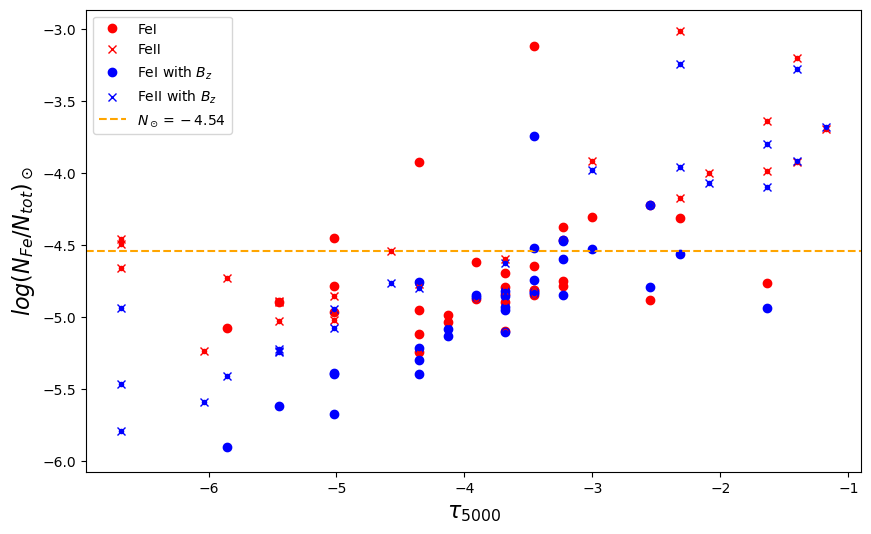

In [30]:
plt.figure(figsize=(10, 6))
#Plot without magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000"], Fe_data[Fe_data["Ion"]==0]["Abun"], "o", c="red", label="FeI")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000"], Fe_data[Fe_data["Ion"]==1]["Abun"], "x", c="red", label="FeII")
# Error bars for measurements
plt.errorbar(
    x=Fe_data[Fe_data["Ion"]==0]["Tau5000"],
    y=Fe_data[Fe_data["Ion"]==0]["Abun"],
    yerr= Fe_data[Fe_data["Ion"]==0]["Abun_err"],
    fmt=".", color="red", ecolor="red")
plt.errorbar(
    x = Fe_data[Fe_data["Ion"]==1]["Tau5000"],
    y = Fe_data[Fe_data["Ion"]==1]["Abun"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err"],
    fmt = ".", color="red", ecolor="red")

#Plot with magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==0]["Abun_mag"], "o", c="blue", label="FeI with $B_z$")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==1]["Abun_mag"], "x", c="blue", label="FeII with $B_z$")

# Error bars for measurements
plt.errorbar(
    Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==0]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==0]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")
plt.errorbar(
    Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==1]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")

#Add Solar abundance to the graph
plt.axhline(y=-4.54, linestyle='--', color='orange', label=r"$N_\odot=-4.54$")
plt.xlabel(r"${\tau}_{5000}$", fontsize=16)
plt.ylabel("$log(N_{Fe}/N_{tot})_\odot$", fontsize=16)
plt.legend()
plt.show()

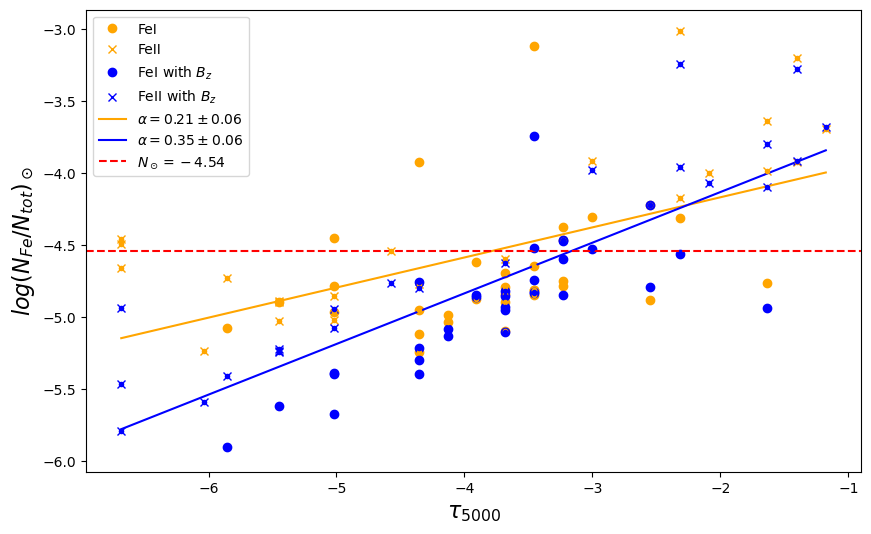

In [46]:
# Scatter plot
plt.figure(figsize=(10, 6))
#Plot without magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000"], Fe_data[Fe_data["Ion"]==0]["Abun"], "o", c="orange", label="FeI")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000"], Fe_data[Fe_data["Ion"]==1]["Abun"], "x", c="orange", label="FeII")
# Error bars for measurements
plt.errorbar(
    x=Fe_data[Fe_data["Ion"]==0]["Tau5000"],
    y=Fe_data[Fe_data["Ion"]==0]["Abun"],
    yerr= Fe_data[Fe_data["Ion"]==0]["Abun_err"],
    fmt=".", color="orange", ecolor="orange")
plt.errorbar(
    x = Fe_data[Fe_data["Ion"]==1]["Tau5000"],
    y = Fe_data[Fe_data["Ion"]==1]["Abun"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err"],
    fmt = ".", color="orange", ecolor="orange")

#Plot with magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==0]["Abun_mag"], "o", c="blue", label="FeI with $B_z$")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==1]["Abun_mag"], "x", c="blue", label="FeII with $B_z$")
# Error bars for measurements
plt.errorbar(
    Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==0]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==0]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")
plt.errorbar(
    Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==1]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")

# Linear approximation for subset

x = Fe_data["Tau5000"]
y = Fe_data["Abun"]
coefficients = np.polyfit(x, y, deg=1)
x_approx = np.linspace(x.min(), x.max(), 100)
y_approx = np.polyval(coefficients, x_approx)

# Calculate error for alpha coefficient
y_pred = np.polyval(coefficients, x)
error = y - y_pred
mse = np.mean(error**2)
rmse = np.sqrt(mse)
alpha_error = rmse / np.sqrt(len(x))
plt.plot(x_approx, y_approx, "-", c="orange", label=r"$\alpha={:.2f} \pm {:.2f}$".format(coefficients[0], alpha_error))

x_mag = Fe_data["Tau5000_mag"]
y_mag = Fe_data["Abun_mag"]
coefficients_mag = np.polyfit(x_mag, y_mag, deg=1)
x_approx_mag = np.linspace(x_mag.min(), x_mag.max(), 100)
y_approx_mag = np.polyval(coefficients_mag, x_approx_mag)

# Calculate error for alpha coefficient
y_pred_mag = np.polyval(coefficients, x_mag)
error_mag = y_mag - y_pred_mag
mse_mag = np.mean(error_mag**2)
rmse_mag = np.sqrt(mse_mag)
alpha_error_mag = rmse_mag / np.sqrt(len(x_mag))

plt.plot(x_approx_mag, y_approx_mag, "-", c="blue", label=r"$\alpha={:.2f} \pm {:.2f}$".format(coefficients_mag[0], alpha_error_mag))

#Add Solar abundance to the graph
plt.axhline(y=-4.54, linestyle='--', color='red', label=r"$N_\odot=-4.54$")

# Axis labels, legend and show
plt.xlabel(r"${\tau}_{5000}$", fontsize=16)
plt.ylabel("$log(N_{Fe}/N_{tot})_\odot$", fontsize=16)
plt.legend()

plt.savefig("data/Fe_with_Bz_approx.jpg", format="jpg")
plt.show()


In [47]:
mask = (Fe_data["Tau5000"]>-2) & (Fe_data["Ion"]==0)
Fe_data[mask]

,Element,Ion,Lambda,Vr,Vr_err,Vsini,Vsini_err,Abun,Abun_err,Chi_sq,...,Energy,Vr_mag,Vr_err_mag,Vsini_mag,Vsini_err_mag,Abun_mag,Abun_err_mag,Chi_sq_mag,Tau5000_mag,Energy_mag
27,26.0,0.0,5074.719,-87.4981,0.0018,7.8787,0.0307,-4.7659,0.0071,0.83122,...,28604.61,-87.6279,0.0031,5.918,0.0973,-4.9388,0.0089,0.71262,-1.6339,28604.61


### Perform A/B testing analysis for abundance distribution happened by chance or influence by applied magnetic field 

In [48]:
significance_level = 0.05

 $H_0$ hypothesis there is no difference in mean abundance with and without magnetic field applied

 $H_\alpha$ there is difference in mean abundance with and without magnetic field

In [49]:
from scipy import stats
stats.ttest_ind(a=Fe_data["Abun"], b=Fe_data["Abun_mag"], equal_var=False)

Ttest_indResult(statistic=2.093067399919165, pvalue=0.038784053964648096)

P value, which is 3.9%, is lower than the chosen significance level of 5%. Therefore, we reject the null hypothesis, which suggests that this difference occurred by chance. This indicates that there is a significant difference in abundance between the groups, and it is important to consider the influence of the magnetic field.

## Identify confidance band for linear regression aproximation

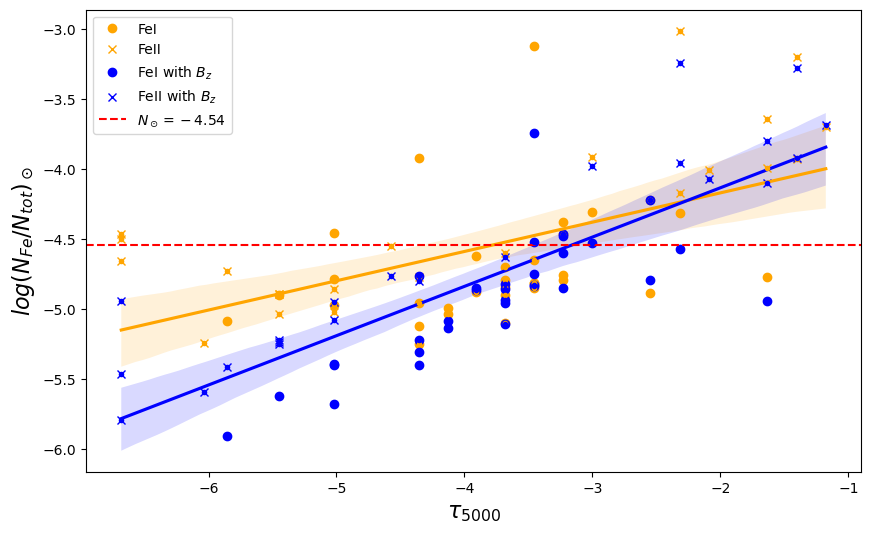

In [50]:
plt.figure(figsize=(10, 6))

#Plot without magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000"], Fe_data[Fe_data["Ion"]==0]["Abun"], "o", c="orange", label="FeI")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000"], Fe_data[Fe_data["Ion"]==1]["Abun"], "x", c="orange", label="FeII")
# Error bars for measurements
plt.errorbar(
    x=Fe_data[Fe_data["Ion"]==0]["Tau5000"],
    y=Fe_data[Fe_data["Ion"]==0]["Abun"],
    yerr= Fe_data[Fe_data["Ion"]==0]["Abun_err"],
    fmt=".", color="orange", ecolor="orange")
plt.errorbar(
    x = Fe_data[Fe_data["Ion"]==1]["Tau5000"],
    y = Fe_data[Fe_data["Ion"]==1]["Abun"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err"],
    fmt = ".", color="orange", ecolor="orange")

#Plot with magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==0]["Abun_mag"], "o", c="blue", label="FeI with $B_z$")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==1]["Abun_mag"], "x", c="blue", label="FeII with $B_z$")
# Error bars for measurements
plt.errorbar(
    Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==0]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==0]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")
plt.errorbar(
    Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==1]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")

# Linear regression with confidance intervall
sns.regplot(x = "Tau5000", y = "Abun", data=Fe_data, scatter=False, color="orange")
sns.regplot(x = "Tau5000_mag", y = "Abun_mag", data=Fe_data, scatter=False, color="blue")

#Add Solar abundance to the graph
plt.axhline(y=-4.54, linestyle='--', color='red', label=r"$N_\odot=-4.54$")

# Axis labels, legend and show
plt.xlabel(r"${\tau}_{5000}$", fontsize=16)
plt.ylabel("$log(N_{Fe}/N_{tot})_\odot$", fontsize=16)
plt.legend()

plt.show()

### Check for normall distribution of residuals and compute stats for model approximation for Fe without applied magnetic field

In [110]:
formula = "Abun ~ Tau5000"
OLS = ols(formula=formula, data=Fe_data)
model = OLS.fit()
result = model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Abun   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     24.65
Date:                Fri, 12 May 2023   Prob (F-statistic):           7.78e-06
Time:                        14:51:12   Log-Likelihood:                -30.793
No. Observations:                  54   AIC:                             65.59
Df Residuals:                      52   BIC:                             69.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7499      0.173    -21.661      0.000      -4.097      -3.402
Tau5000        0.2092      0.042      4.965      0.000       0.125       0.294
==============================================================================
Omnibus:                       13.929   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.079
Skew:                           1.125   Prob(JB):                     0.000532
Kurtosis:                       4.281   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the summary of model approximation for distribution of Fe without applied magnetic field we see that values highly distributed from the mean with R value 0.322. Slope of regression line has value of 0.21 $\pm$ 0.04 with confidance band  of 95 % that is true value in range from 0.125 to 0.294.

In [111]:
residuals = model.resid

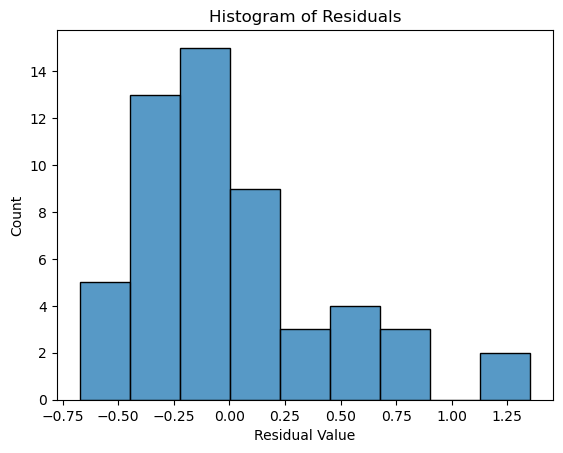

In [112]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

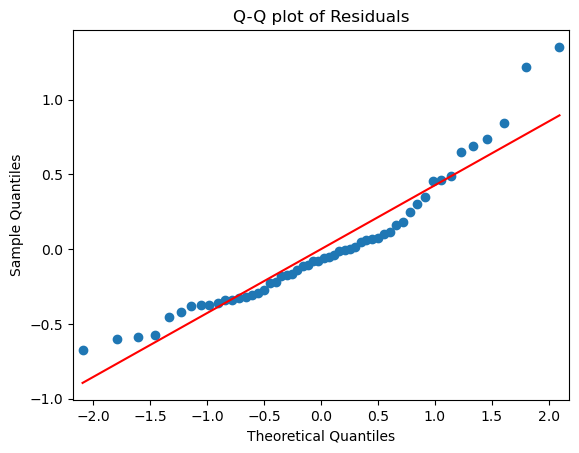

In [113]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

#### We confirm that residual values are normally distribution with 5 outlied measuremts. With this results we may indicate that linear regression analysis may be applied to the data.

### Let's test for homoscedasticity

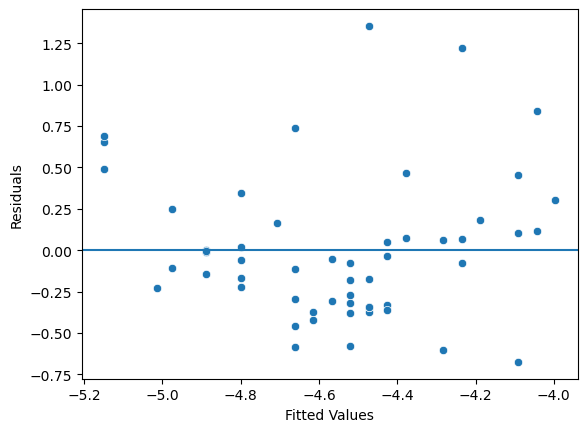

In [114]:
fitted_values = model.predict(Fe_data["Tau5000"])

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

### Check for normall distribution of residuals and compute stats for model approximation for Fe with applied magnetic field

In [115]:
formula_mag = "Abun_mag ~ Tau5000_mag"
OLS_mag = ols(formula=formula_mag, data=Fe_data)
model_mag = OLS_mag.fit()
result_mag = model_mag.summary()
result_mag

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Abun_mag   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     106.9
Date:                Fri, 12 May 2023   Prob (F-statistic):           3.25e-14
Time:                        14:52:05   Log-Likelihood:                -19.302
No. Observations:                  54   AIC:                             42.60
Df Residuals:                      52   BIC:                             46.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.4275      0.140    -24.494      0.000      -3.708      -3.147
Tau5000_mag     0.3521      0.034     10.338      0.000       0.284       0.420
==============================================================================
Omnibus:                        8.233   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.532
Skew:                           0.633   Prob(JB):                       0.0140
Kurtosis:                       4.480   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the summary of model approximation for distribution of Fe with applied magnetic field we see that values correlated towards the mean with R value 0.673. Slope of regression line has value of 0.35 $\pm$ 0.03 with confidance band  of 95 % that is true value in range from 0.284 to 0.420.

In [116]:
residuals_mag = model_mag.resid

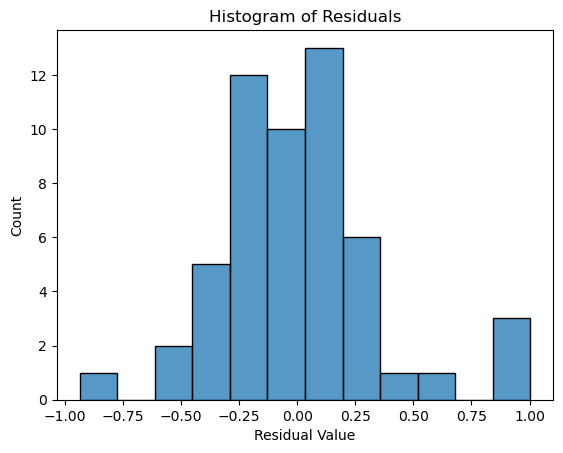

In [117]:
fig = sns.histplot(residuals_mag)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

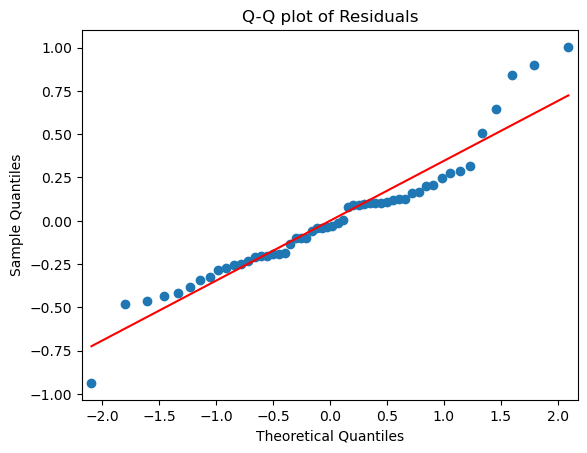

In [118]:
sm.qqplot(residuals_mag, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

#### We confirm that residual values are normally distribution with 5 outlied measuremts for Fe with applied magnetic field. With this results we may indicate that linear regression analysis may be applied to the data.

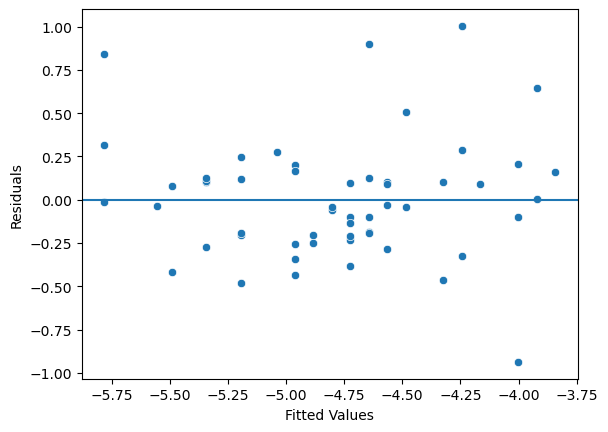

In [119]:
fitted_values_mag = model_mag.predict(Fe_data["Tau5000_mag"])

fig = sns.scatterplot(x=fitted_values_mag, y=residuals_mag)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated.

## Let's plot final image for our analysis

In [120]:
conf = model_mag.params["Tau5000_mag"]
conf

0.352133099051136

In [121]:
slope_error = model_mag.bse["Tau5000_mag"]
slope_error

0.03406078505940013

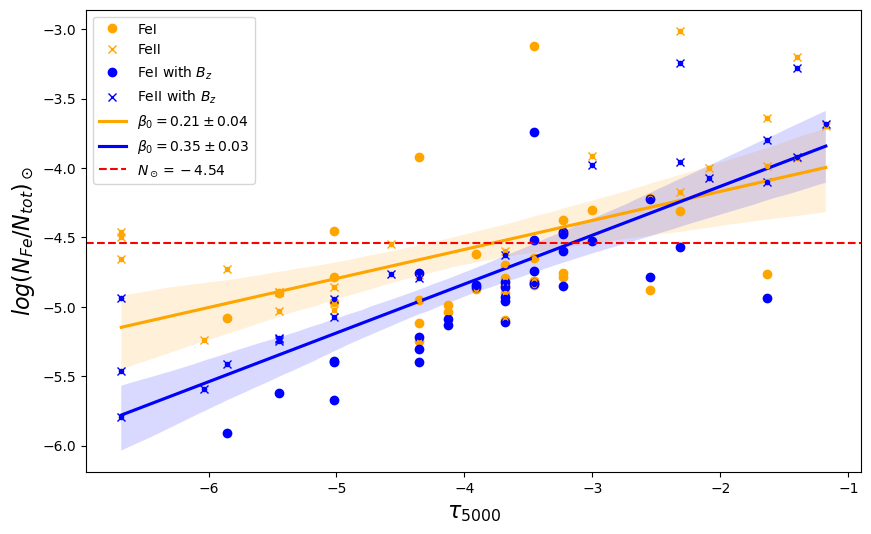

In [123]:
plt.figure(figsize=(10, 6))

#Plot without magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000"], Fe_data[Fe_data["Ion"]==0]["Abun"], "o", c="orange", label="FeI")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000"], Fe_data[Fe_data["Ion"]==1]["Abun"], "x", c="orange", label="FeII")
# Error bars for measurements
plt.errorbar(
    x=Fe_data[Fe_data["Ion"]==0]["Tau5000"],
    y=Fe_data[Fe_data["Ion"]==0]["Abun"],
    yerr= Fe_data[Fe_data["Ion"]==0]["Abun_err"],
    fmt=".", color="orange", ecolor="orange")
plt.errorbar(
    x = Fe_data[Fe_data["Ion"]==1]["Tau5000"],
    y = Fe_data[Fe_data["Ion"]==1]["Abun"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err"],
    fmt = ".", color="orange", ecolor="orange")

#Plot with magnetic field calculations
plt.plot(Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==0]["Abun_mag"],
         "o", c="blue", label="FeI with $B_z$")
plt.plot(Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"], Fe_data[Fe_data["Ion"]==1]["Abun_mag"],
         "x", c="blue", label="FeII with $B_z$")
# Error bars for measurements
plt.errorbar(
    Fe_data[Fe_data["Ion"]==0]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==0]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==0]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")
plt.errorbar(
    Fe_data[Fe_data["Ion"]==1]["Tau5000_mag"],
    Fe_data[Fe_data["Ion"]==1]["Abun_mag"],
    yerr = Fe_data[Fe_data["Ion"]==1]["Abun_err_mag"],
    fmt = ".", color="blue", ecolor="blue")

# Linear regression with confidance intervall
sns.regplot(x = "Tau5000", y = "Abun",
            data=Fe_data, scatter=False,
            color="orange",
            label=r"$\beta_0={:.2f} \pm {:.2f}$".format(model.params["Tau5000"], model.bse["Tau5000"])
           )
sns.regplot(x = "Tau5000_mag", y = "Abun_mag",
            data=Fe_data, scatter=False,
            color="blue",
            label=r"$\beta_0={:.2f} \pm {:.2f}$".format(model_mag.params["Tau5000_mag"], model_mag.bse["Tau5000_mag"])
           )

#Add Solar abundance to the graph
plt.axhline(y=-4.54, linestyle='--', color='red', label=r"$N_\odot=-4.54$")

# Axis labels, legend and show
plt.xlabel(r"${\tau}_{5000}$", fontsize=16)
plt.ylabel("$log(N_{Fe}/N_{tot})_\odot$", fontsize=16)
plt.legend()
plt.savefig("data/Fe_with_Bz_approx.jpg", format="jpg")
plt.show()